In [30]:
import os
import json
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
# ! Specify result dir
RESULT_DIR = 'exp_output/2023-11-24-02_41_54'
DATASET = 'office_home'
SELECT_GPT4V_SUCCESS = True
SELECT_LLAVA_SUCCESS = True

In [31]:
def show_img(img_path):
    if os.path.exists(img_path):
        img = imread(img_path)

        fig = plt.figure()
        fig.set_dpi(100)

        plt.imshow(img)
        plt.axis('off')
        plt.show()


def read_and_reformat_jsonl(file_path):
    reformatted_data = {}
    with open(file_path, 'r') as file:
        for line in file:
            record = json.loads(line)
            image_key = record.pop('image')
            reformatted_data[image_key] = record
    return reformatted_data


def randomize_dict(input_dict):
    items = list(input_dict.items())  # Convert dict items to a list
    random.shuffle(items)  # Shuffle the list
    randomized_dict = dict(items)  # Convert back to a dictionary
    return randomized_dict

In [32]:
output_llava_path = f'../{RESULT_DIR}/unified_output_llava-v1.5-13b.jsonl'
output_gpt4v_path = f'../{RESULT_DIR}/random_1/{DATASET}/unified_output_gpt-4-vision-preview.jsonl'
output_gpt4v = read_and_reformat_jsonl(output_gpt4v_path)
output_llava = read_and_reformat_jsonl(output_llava_path)

img: Real World/Spoon/00043.jpg
gpt-4v output:
{'dataset': 'office_home', 'domain': 'Real World', 'subject': 'nature', 'true_class': 'Spoon', 'predicted_class': 'Spoon', 'confidence_score': '1', 'reasoning': 'The image displays multiple spoons in a row, recognizable by their typical shape with an oval bowl at one end and a handle at the other.\n---END FORMAT TEMPLATE---', 'id': '87'}
llava output:
{'dataset': 'office_home', 'domain': 'Real World', 'subject': 'nature', 'true_class': 'Spoon', 'predicted_class': 'Spoon', 'id': '1992', 'confidence_score': '0.9', 'reasoning': 'The image shows four spoons in a row, all of which are made of metal and have a shiny appearance.'}


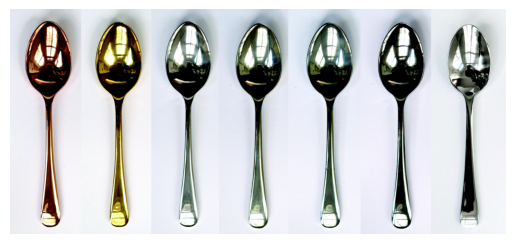

In [36]:
output_gpt4v = randomize_dict(output_gpt4v)
for img, val in output_gpt4v.items():
    gpt4v_success_flag = val['true_class'] == val['predicted_class']
    llava_success_flag = output_llava[img]['predicted_class'] is not None and output_llava[img]['true_class'] == output_llava[img]['predicted_class']
    if gpt4v_success_flag == SELECT_GPT4V_SUCCESS and llava_success_flag == SELECT_LLAVA_SUCCESS:
        print(f'img: {img}')
        print(f'gpt-4v output:\n{val}')
        print(f'llava output:\n{output_llava[img]}')
        show_img(f'../{RESULT_DIR}/random_1/{DATASET}/{img}')
        break